In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [8]:
df=pd.read_excel("Q1.xlsx")
df=df.sample(frac=1,random_state=42).reset_index(drop=True)
print(df)

X=df.drop("Y",axis=1).values.astype(float)
ones=np.ones((X.shape[0],1))
X=np.column_stack((X,ones))
Y=df["Y"].values.astype(float)
Y=np.expand_dims(Y,axis=1)
print(X)

       X1     X2     X3      X4   X5  X6    X7  X8      Y
0    0.62  808.5  367.5  220.50  3.5   2  0.40   3  16.47
1    0.66  759.5  318.5  220.50  3.5   2  0.25   1  13.17
2    0.98  514.5  294.0  110.25  7.0   2  0.40   3  32.82
3    0.79  637.0  343.0  147.00  7.0   4  0.40   4  41.32
4    0.64  784.0  343.0  220.50  3.5   3  0.25   4  16.69
..    ...    ...    ...     ...  ...  ..   ...  ..    ...
763  0.76  661.5  416.5  122.50  7.0   5  0.10   1  32.21
764  0.86  588.0  294.0  147.00  7.0   4  0.10   2  26.33
765  0.71  710.5  269.5  220.50  3.5   4  0.10   5  10.67
766  0.98  514.5  294.0  110.25  7.0   5  0.25   4  28.62
767  0.90  563.5  318.5  122.50  7.0   4  0.10   2  28.83

[768 rows x 9 columns]
[[6.200e-01 8.085e+02 3.675e+02 ... 4.000e-01 3.000e+00 1.000e+00]
 [6.600e-01 7.595e+02 3.185e+02 ... 2.500e-01 1.000e+00 1.000e+00]
 [9.800e-01 5.145e+02 2.940e+02 ... 4.000e-01 3.000e+00 1.000e+00]
 ...
 [7.100e-01 7.105e+02 2.695e+02 ... 1.000e-01 5.000e+00 1.000e+00]
 [9.800

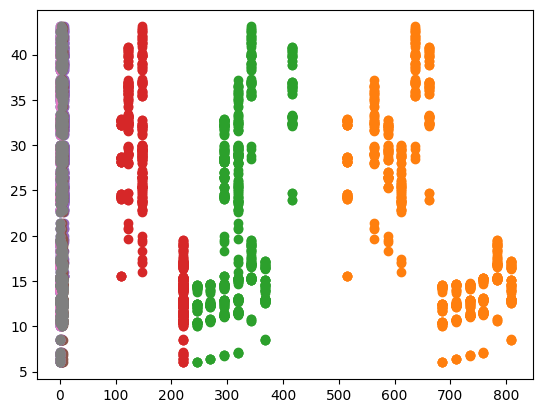

In [9]:
for i in range(8):
    plt.scatter(df.iloc[:,i].values,df["Y"].values)
plt.show()

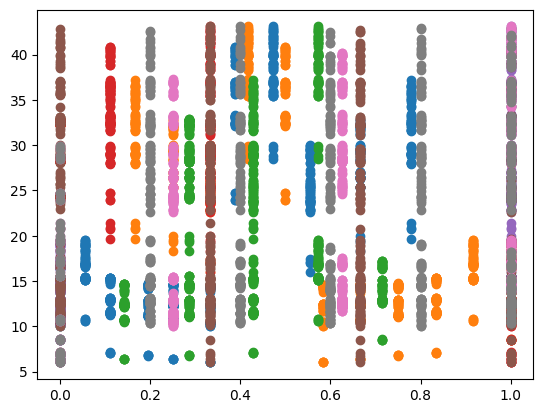

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))  # default range [0,1]
X=scaler.fit_transform(X)
for i in range(8):
    plt.scatter(X[:,i],Y)
plt.show()

In [11]:
def train_test_split(X,Y,split):
    # split belongs [0,1]
    split_num=int(Y.shape[0]*split)
    Y_1=Y[:split_num,:]
    Y_2=Y[split_num:,:]
    X_1=X[:split_num,:]
    X_2=X[split_num:,:]
    return X_1,X_2,Y_1,Y_2
# seperating traing set for 70%
x_train,xtem,y_train,ytem=train_test_split(X,Y,split=0.7)
print(x_train.shape,y_train.shape)
# seperating cross validation(15%) and testing set(15%) split=0.5
x_val,x_test,y_val,y_test=train_test_split(xtem,ytem,split=0.5)
print(x_test.shape,y_test.shape)

(537, 9) (537, 1)
(116, 9) (116, 1)


In [12]:
theta=np.zeros((X.shape[1],1)) # defined theta for parameters

def h(xi,theta):
    xi=np.expand_dims(xi,axis=0)
    # xi will be an matrix so x_i.shape == (1,9)
    r=xi@theta
    return r[0][0]

def error(X,theta,Y):
    r=((X@theta-Y).T @ (X@theta-Y))/X.shape[0]
    return r[0][0]

print(h(x_train[0],theta),error(X,theta,Y))

0.0 599.2906108802084


Q1 part 1

In [13]:
XtX = x_train.T @ x_train
print("cond(X^T X) =", np.linalg.cond(XtX))
# conditioning value is much high so we will use np.linalg.pinv(X)=(X.T@X)@X.T it will give an pseudo value

cond(X^T X) = inf


In [14]:

theta_1 = np.linalg.pinv(x_train.T @ x_train) @ (x_train.T @ y_train)
print(theta_1,theta_1.shape)
err=error(x_train,theta_1,y_train)
print(err)
print(error(x_val,theta_1,y_val))
print(error(x_test,theta_1,y_test))


[[ -24.95073682]
 [-206.97415401]
 [ 115.24750376]
 [ 134.92180489]
 [  14.83482972]
 [  -0.22727928]
 [   8.0332564 ]
 [   0.80237852]
 [   0.        ]] (9, 1)
8.81056545020638
7.94284214122468
7.920323307373895


Q1 part 2

In [15]:
class linear_regression_model:
    def __init__(self):
        self.weights=None
        self.alpha=None
        self.error_T=[]
        self.error_val=[]
        self.epochs=None
    def fit(self,xt,yt,xv,yv,alpha,epochs):
        self.weights=np.zeros((xt.shape[1],1)) # weight initialization
        self.alpha=alpha
        self.epochs=epochs
        for i in range(self.epochs):
            m=xt.shape[0]
            self.weights-=(self.alpha*2/(m))*(xt.T@(xt@self.weights-yt))
            train_err=error(xt,self.weights,yt)
            val_err=error(xv,self.weights,yv)
            self.error_T.append(train_err)
            self.error_val.append(val_err)
            print(f"Epoch {i+1}/{self.epochs} | Train Error: {train_err:.4f} | Val Error: {val_err:.4f}")
    def training_history(self):
        return self.error_T
    def validation_history(self):
        return self.error_val
    def weightsa(self):
        return self.weights
    def prediction(self,x):
        if x.shape[0]==1:
            return x@self.weights[0][0]
        else :
            return x@self.weights
    def errorplot(self):
        epoch=np.arange(1,self.epochs+1)
        plt.plot(epoch,self.error_T,label='training error')
        plt.plot(epoch,self.error_val,label='validation error')
        plt.xlabel("epochs")
        plt.ylabel("error")
        plt.legend()
        plt.show()

In [ ]:
linear_regression=linear_regression_model()
linear_regression.fit(x_train,y_train ,x_val , y_val , alpha=0.35,epochs=1000000)
linear_regression.errorplot()

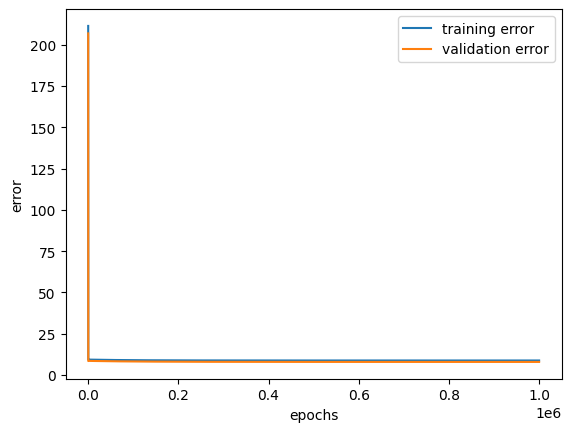

[[ -24.80136775]
 [-205.70833589]
 [ 114.59619979]
 [ 134.12784305]
 [  14.87413089]
 [  -0.22701469]
 [   8.03306327]
 [   0.80306795]
 [   0.        ]]
[[ -24.95073682]
 [-206.97415401]
 [ 115.24750376]
 [ 134.92180489]
 [  14.83482972]
 [  -0.22727928]
 [   8.0332564 ]
 [   0.80237852]
 [   0.        ]]


In [30]:
linear_regression.errorplot()
print(linear_regression.weightsa())
print(theta_1)